In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [2]:
import seaborn as sns

df_da_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_da_US = df_da_US.dropna(subset=["salary_year_avg"])

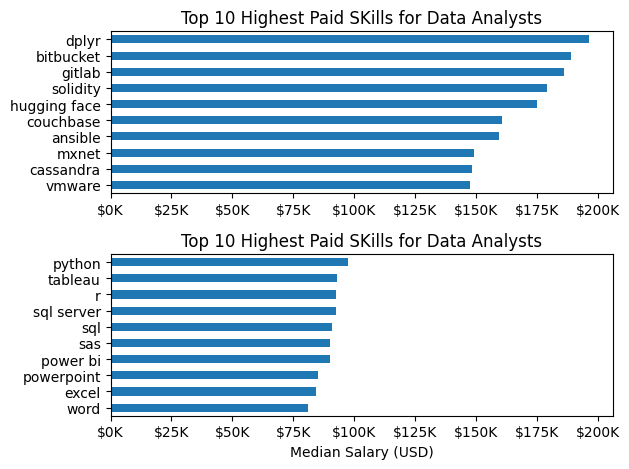

In [ ]:
df_da_US = df_da_US.explode("job_skills")
df_da_US_group = df_da_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"])

df_DA_Us_Toppay = df_da_US_group.sort_values(by = "median",ascending=False).head(10)
df_DA_Us_skills = df_da_US_group.sort_values(by = "count",ascending= False).head(10).sort_values(by ="median",ascending=False)






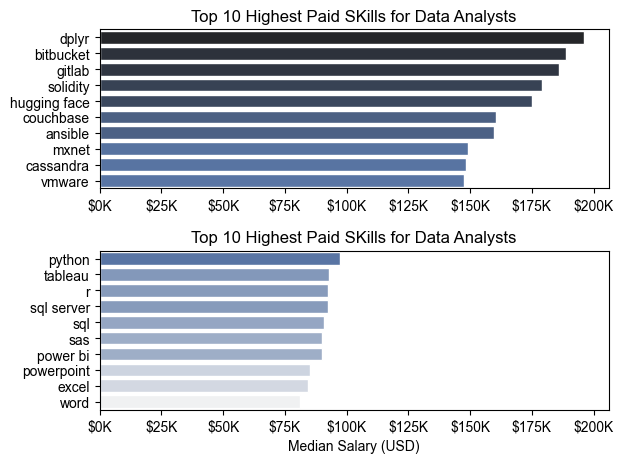

In [13]:
fig,ax = plt.subplots(2,1)

sns.set_theme(style= "ticks")

#df_DA_Us_Toppay[::-1].plot(kind = "barh",y = "median",ax= ax[0],legend= False)
sns.barplot(data= df_DA_Us_Toppay,x = "median",y = df_DA_Us_Toppay.index,ax = ax[0],hue= "median",palette="dark:b_r")
ax[0].set_title("Top 10 Highest Paid SKills for Data Analysts")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x / 1000)}K"))
ax[0].legend().remove()

#df_DA_Us_skills[::-1].plot(kind = "barh",y = "median",ax= ax[1],legend = False)

sns.barplot(data= df_DA_Us_skills,x = "median",y = df_DA_Us_skills.index,ax = ax[1],hue ="median",palette="light:b")
ax[1].set_title("Top 10 Highest Paid SKills for Data Analysts")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x / 1000)}K"))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Jobs')

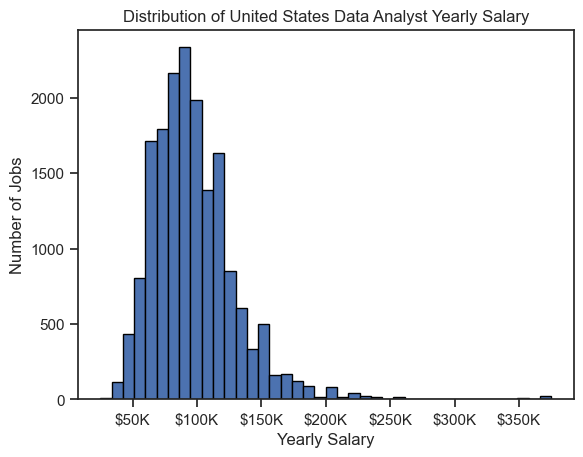

In [15]:
df_da_US["salary_year_avg"].plot(kind ="hist",bins = 40,edgecolor = "black")


ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${int(y/1000)}K"))

plt.title("Distribution of United States Data Analyst Yearly Salary")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")

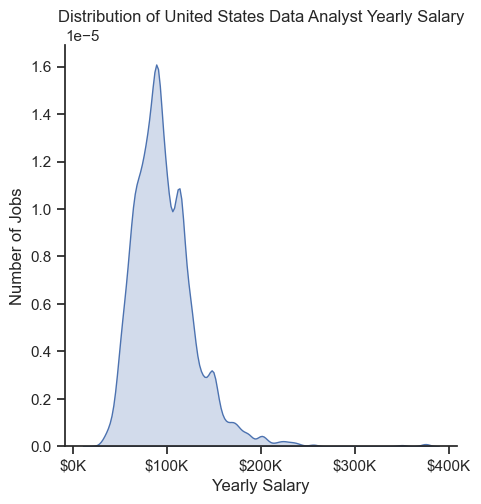

In [19]:
sns.displot(df_da_US["salary_year_avg"],kind ="kde",fill =True)
ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${int(y/1000)}K"))

plt.title("Distribution of United States Data Analyst Yearly Salary")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.show()

In [21]:
job_titles = ["Data Analyst","Data Scientist","Data Engineer"]

df_Three_Us = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")].copy()
df_Three_Us= df_Three_Us.dropna(subset= "salary_year_avg")
job_lists =[df_Three_Us[df_Three_Us["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

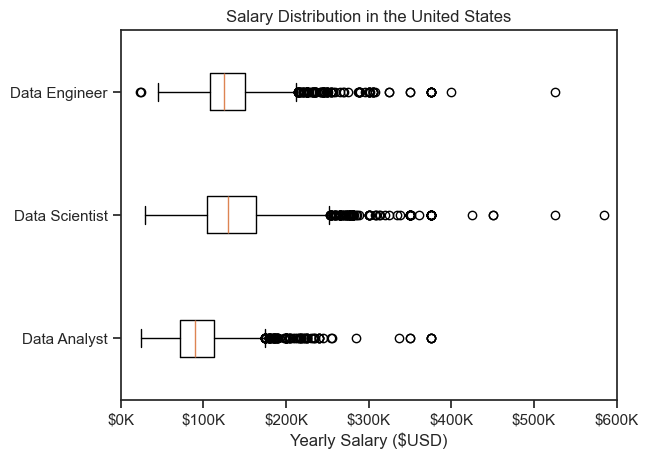

In [22]:
plt.boxplot(job_lists,tick_labels = job_titles,vert=False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x / 1000)}K"))
plt.xlim(0,600000)
plt.show()

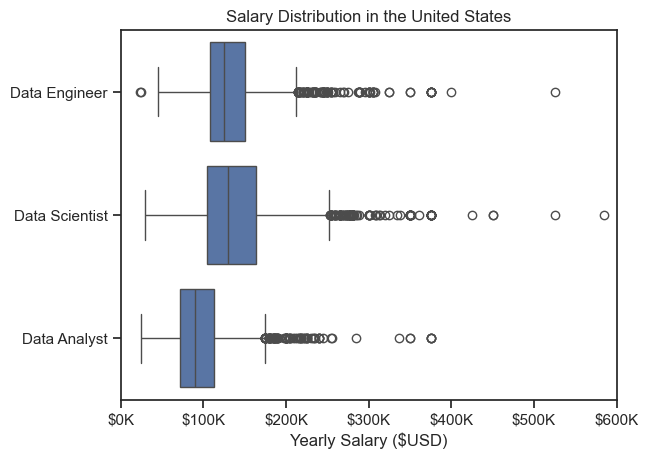

In [25]:
sns.boxplot(data=df_Three_Us,x ="salary_year_avg",y="job_title_short")

plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
ax = plt.gca()
plt.ylabel("")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"${int(x / 1000)}K"))
plt.xlim(0,600000)
plt.show()